# Supervised, Unsupervised and Reinforcement Learning

One of the ways of differentiating categories of machine learning algorithms is to split them into **supervised**, **unsupervised** and **reinforcement** learning methods. 

With **supervised** methods, the training data come with the outcome you are trying to predict--they are labeled. For example, with linear regression, we have linked input and output values and are predicting the function that relates them. With image classification, we might start with a set of images that are labeled as cats, dogs, people, etc., and then train the algorithm to learn to classify a new image into these classes.

With **unsupervised** methods, we have unlabeled data (no y-values or pre-defined categories) and ask the algorithm to learn patterns from the data itself. These methods usually try to categorize the observations.

With **reinforcement learning**, the training data is also unlabeled, but the system received feedback for its actions/categorizations. Game systems are a classic example of this--learn to play chess be playing games and learning what moves lead to a winning strategy. Robotics and autonomous vehicles are other applications--learn how to climb stairs by getting points for actions that leads to going up stairs.

There are also methods that mix these.

## Types of Supervised Learning

The two main types of supervised learning are **classification** and **regression**.

In **classification**, the response variable (y) is categorical or discrete. For example, this image is a cat, dog, bird, etc.; you do or do not have some disease; this plant is a desired crop or a weed to kill; etc.

In **regression**, the response variable (y) is continuous or numerical. in the automobile fuel efficiency data we've been working with, miles per gallon is the response variable and the regression approaches we've been looking at are finding the model that takes the input (hp) and predicts the output (mpg).

The image below from the [maplearn.ml package documentation](https://maplearn.readthedocs.io/en/latest/maplearn.ml.html) provides a nice visual of the general idea of classification and regression.

![Classification vs regression. Image from maplearn.ml documentation](images/classif_reg.maplearn.png)


## Types of classification

Many methods have been developed for classification and the list below is certainly not comprehensive. Nor can we hope to cover all of them in this class. But hopefully this list gives you a sense of the diversity and places to start looking.

* Linear Classifiers
  * Logistic regression
  * Naive Bayes classifier
  * Fisher’s linear discriminant
* Support vector machines
  * Least squares support vector machines
* Quadratic classifiers
* Kernel estimation
  * k-nearest neighbor
* Decision trees
  *Random forests
* Neural networks
* Learning vector quantization

## Logistic Regression

Despite its name, **logistic regression** is a **classification** algorithm which estimates discrete (most often binary) values--1/0, yes/no, true/false--based on input data. Logistic regression predicts the probability of occurrence of an event by fitting a **logit function**. 

The linear regression name comes from the underlying *_____ which models the log odds of the outcome (yes/no, 1/0) as a linear combination of the predictor variables.* (check on this)



### Logistic Regression Sigmoid Function

Logistic regression makes use of the **sigmoid function** pictured below. The sigmoid function has values very close to (but not equal to) 0 or 1 for most of its distribution. The formula for the graph below is:

$$ 
    \sigma(x) = \frac{1}{1+exp(-x)}\\
$$
And think of $\sigma(x)$ as *y*.

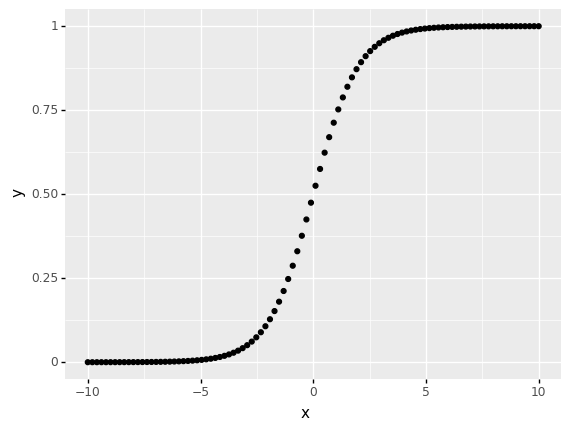

<ggplot: (141096393536)>

In [1]:
# Code to generate sigmoid graph below
import plotnine as pn
import numpy as np
import pandas as pd
x = np.linspace(-10,10, num=100)
y = 1/(1+np.exp(-x))

df = pd.DataFrame(x,y)

pn.ggplot(df, pn.aes(x='x', y='y')) + pn.geom_point()

The goal is to find the **logistic regression function**, $p(x)$, such that the predicted responses, $p(x_{i})$, are as close to the **actual response**, $y_{i}$ for each observation. Remember that this is a binary response, 0 or 1. This is the reason to use the sigmoid function since most of its values are close to 0 or 1. 

### Logistic Regression Methodology

As the name implies, we use a linear function, $f(x) = b_0 + b_1x_1 + ... + b_rx_r$, which is also called the **logit**. The variables $b_0, b_1,..., b_r$ are the **estimators** of the regression coefficients.

The logistic regression function, $p(x)$, is the sigmoid function, $f(x): p(x)=1/(1+exp(-f(x)))$. This function is often interpreted as the **predicted probability** that the output for a given $x$ is equal to 1.

Logistic regression determines the **best predicted weights**, b_0, b_1,..., b_r$, such that the function $p(x)$ is as close as possible to all actual (observed) responses $y_i$. Calculating the best weights using training data is called model training or fitting.


### Single Variable Logistic Regression example


In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Let's make some data to work with
x = np.arange(10).reshape(-1, 1) # Reshape to column vector
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Question what are these data?

There are a number of options for the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier. For this example, we will use the `liblinear` solver--the algorithm used in the optimization step. This is mostly for two reasons...1) until recently this was the default and 2) it produces some "interesting" results to discuss. Certainly look at the options and play with different solvers.

In [3]:
# Create and fit a model using our data
model = LogisticRegression(solver='liblinear').fit(x,y)

In [4]:
# Let's look at the model parameters

print("Classes:", model.classes_)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Classes: [0 1]
Intercept: [-1.04608067]
Coefficients: [[0.51491375]]


In [5]:
# How does the model do?
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [6]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In the output matrix above, each row corresponds to a single observation ($x$). The first column is the predicted probability of the output being the  $0^{th}$ class-- 0 or $1-p(x)$. The second column is the predicted probability of class 1, $p(x)$.

The above example and image below come from the Real Python blog [*Logistic Regression in Python*](https://realpython.com/logistic-regression-python/).

![](images/log-reg-5_real_python.png)

The green circles represent the actual responses ($y$) that are correctly predicted by the model. The red x shows the incorrect prediction. The solid line is the estimated logistic function $p(x)$, and the grey squares along that line are the predicted responses (second column in table). The black dashed line is the logit, $f(x)$.

As the plot above and the `model.predict(x)` output show, the model correctly classifies nine of the 10 observations. As such, the accuracy is 9/10=0.9, which is available with the `model.score()` method:

In [7]:
# Check the model score

model.score(x,y)

0.9

### Classification metrics

The `model.score()` tells us something about our model's performance, but not really everything we would like to know. 

Taking a different classification problem, let's look at a model that classifies images as either cat or not cat. Here are common terms used to describe classification success:

![Cat classification success](images/classification_success.png)

One way of gaining insight into our model is what is called a **confusion matrix**. This summarizes the true and false positive and negative counts.

In [8]:
#Show the confusion matrix
cm = confusion_matrix(y, model.predict(x))
print(cm)

[[3 1]
 [0 6]]


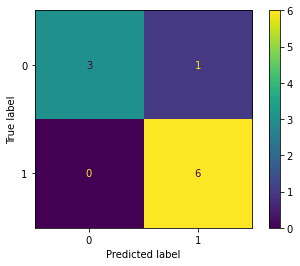

In [9]:
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

### Additional Classification Metrics

For the following, we will refer to the 0 class as negative and the 1 class as positive. 

**Precision**: The ability of the classifier not to label as positive (1) a sample that is negative (0). Out of those predicted positive, how many are actual positive.

$$ Precision =  \frac{True Positive}{True Positive + False Positive} =  \frac{True Positive}{Total Predicted Positive} $$

Precision is a good measure when the cost of False Positive is high. E.g. Email spam filter. If lots of email is falsely flagged as spam and discarded, you might miss important emails.

**Recall**:  Te ability of the classifier to find all the positive (1) samples. How many of the actualy positives does the model label as positive.

$$ Recall = \frac{True Positive}{True Positive + False Negative} =  \frac{True Positive}{Total Actual Positive} $$

Recall is a good measure when the cost of False Negative is high. E.g. disease diagnosis. If a sick patient is predicted as not sick, the cost associated with a false negative is high.

**F1-Score** also known as F-beta: A weighted harmonic mean of the precision and recall, where and F-beta score reaches its best value at 1 and worst score at 0. 


The F-beta score weighs recall more than precision by a factor of `beta`. `beta=1.0` means recall and precision are equally important. 


$$ F1 = 2\frac{Precision*Recall}{Precision+Recall} $$

** Support**: The number of samples in each class.
  
**Accuracy**: Total number of correct predictions over all predictions. Only accurate with balanced models (relatively equal frequency of 0/1)



In [10]:
# Another set of classification metrics

print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



### Logistic regression example

For this example, let's use data about GRE score (Graduate Record Exam), GPA (Grade Point Average) and prestige of the undergraduate institution to model admission decision into grad school (admit/don't admit).


In [11]:
import pandas as pd
import numpy as np
import plotnine as pn
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes = pd.read_csv("data/diabetes.csv")


diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Setup train/test data

x= diabetes[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 
            'BMI', 'DiabetesPedigreeFunction', 'Age']]
y= diabetes.Outcome

# Split to 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [13]:
# Create and fit model

model = LogisticRegression().fit(x_train,y_train)

In [14]:
# Test the model

# Transfor x_test
#x_test = scaler.transform(x_test)

# Predict ys using model and test data
y_pred = model.predict(x_test)

# Get model.score for both training and test data
print(f'Model score on training data: {model.score(x_train,y_train)}')
print(f'Model score on testing data: {model.score(x_test,y_test)}')


Model score on training data: 0.7708333333333334
Model score on testing data: 0.7916666666666666


In [15]:
# See the confusion matrix

confusion_matrix(y_test,y_pred)

array([[115,  15],
       [ 25,  37]], dtype=int64)

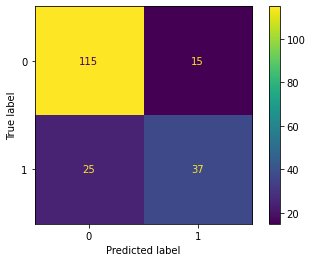

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [17]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



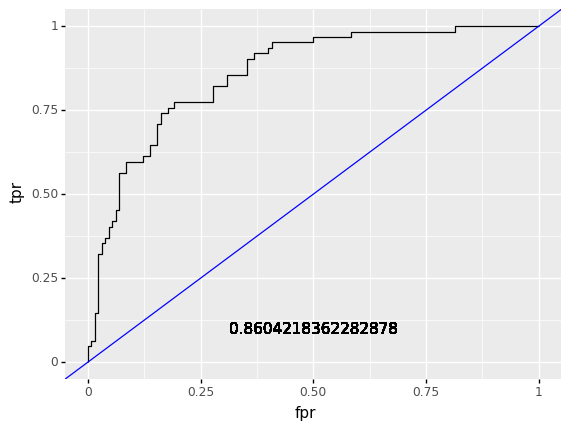

<ggplot: (141098814136)>

In [18]:
# ROC Curve

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()

df= pd.DataFrame(fpr,tpr)
pn.ggplot(df, pn.aes(x='fpr', y='tpr')) + pn.geom_line() + pn.geom_text(pn.aes(x= 0.5, y= 0.1, label=auc)) + pn.geom_abline(intercept=0, slope=1, color='blue')